In [2]:
#from IPython.external import mathjax; mathjax.install_mathjax()
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import healpy.projector as pro
import astropy.io.fits as fits
from scipy.stats import gaussian_kde
import scipy
import pandas as pd
import pickle
from pylab import arange, show, cm
import seaborn as sb
%matplotlib inline

In [3]:
with open('../Data/maps_nest.pickle') as f:  # Python 3: open(..., 'rb')
    coords, planck_bb, planck_mw,  phot, phot_modesub, phot_mpsub = pickle.load(f)
planck_bb.columns



Index([u'$T$', u'$B$', u'$I_{dust}(545)$', u'$R_{PR1}$', u'$\tau_{353,PR1}$',
       u'$U$'],
      dtype='object')

In [4]:
cmap = cm.rainbow
cmap.set_under('w')

In [11]:
PCCS_crossmatrix = planck_mw.join(planck_bb[['$I_{dust}(545)$','$T$','$B$']]).corr(method='spearman')

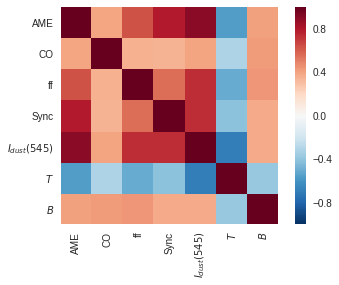

In [13]:
sb.heatmap(PCCS_crossmatrix,
          square=True)
plt.savefig('../Plots/ch_datasources/PCCS_corrmatrix.pdf')

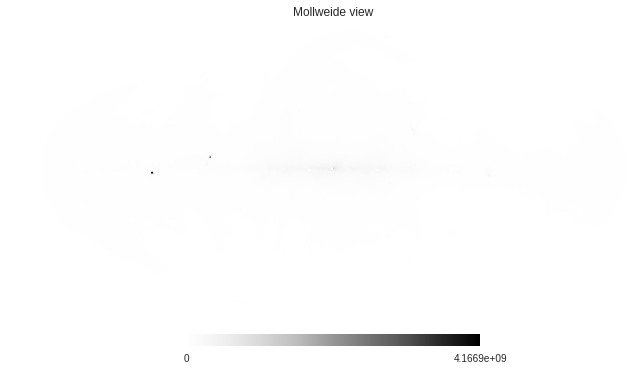

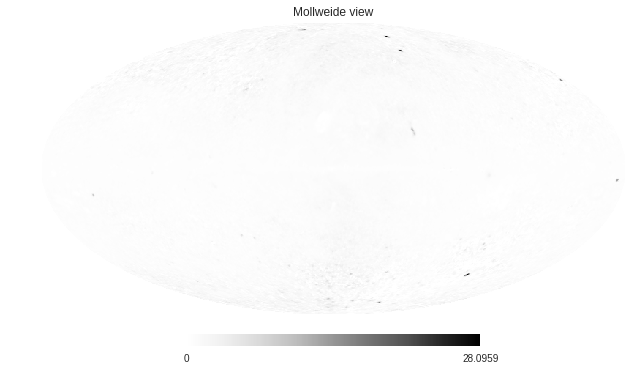

In [16]:
sync          = hp.mollview(planck_mw.Sync, nest=True, return_projected_map=True)
ame_rad_ratio = hp.mollview(planck_mw['AME']/planck_bb['$I_{dust}(545)$'], nest =True, return_projected_map=True)

AttributeError: 'AxesImage' object has no attribute 'plot'

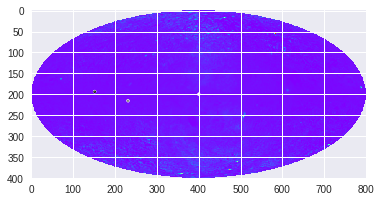

In [24]:
f = plt.imshow(ame_rad_ratio, cmap=cmap)


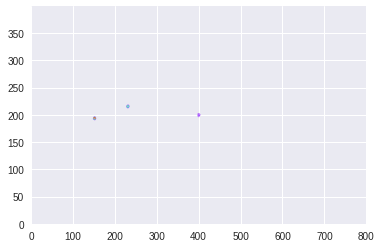

In [27]:
plt.contour(sync, cmap=cmap, alpha=0.5)

In [ ]:
sb.axes_style("white"):
    
    

    
hp.mollview(planck_mw['AME']/planck_bb['$I_{dust}(545)$'], 
               norm='hist', 
                nest=True, 
                #min=1.5, max = 2.0, 
                cmap=cmap,
                title = '${I_{AME}}_{var}(28.4 GHz) / I_{dust}(545 GHz)$')
plt.savefig('../Plots/ch_datasources/R_PCAMEtoPCRad.pdf')


hp.mollview(AMEvar_freq, 
            #norm='hist', 
            nest=True, 
            min=12, 
            max = 40, 
            cmap=cmap,
           title="PCAME Peak Frequencies",
           unit='GHz')

plt.savefig('../Plots/ch_datasources/PCAME_var_freq.pdf')